In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

### BEFORE YOU DO ANYTHING...
In the terminal:
1. Navigate to __inside__ your ILAS_Python repository.
2. __COMMIT__ any un-commited work on your personal computer.
3. __PULL__ any changes *you* have made using another computer.
4. __PULL__ textbook updates (including homework answers).

1. __Open Jupyter notebook:__   Start >> Programs (すべてのプログラム) >> Programming >> Anaconda3 >> JupyterNotebook
1. __Navigate to the ILAS_Python folder__. 
1. __Open today's seminar__  by clicking on 8_Plotting.

# Plotting

# Lesson Goal

To use the Matplotlib Python package to visualise results. 

# Objectives

Matplotlib is the most widel used Python module for plotting.

It's functionality is huge.

Today's objective is to:
- introduce the core functionality of Matplotlib as a basis that you can build on. 
- focus on tasks where plotting *programmatically* can be advantageous over other *computational* plotting methods. 

Use online resources including the Matplotlib Gallery (http://matplotlib.org/gallery.html), or Github (http://gree2.github.io/python/2015/04/10/python-matplotlib-plotting-examples-and-exercises), as a source of tutorials and sample code for plotting. 

 

## Why we are studying this:

Plotting is one of the most important computational tasks used by  engineers and scientists.  

Plots are used for:

- checking computed results visually
- understanding data
- presenting data






## Packages
We will be using:
- Numpy for numerical computation.
- Matplotlib to produce figures and animations. 
- Ipywidgets to make our plots interactive

In [3]:
import numpy as np

# Plotting and animation
import matplotlib
from matplotlib import animation, rc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Interactive plotting
try:
    import ipywidgets
except ImportError:
    try:
        !{sys.executable} -m pip -q install ipywidgets
        import ipywidgets
    except ImportError:
        !{sys.executable} -m pip -q --user install ipywidgets
    finally:
        !jupyter nbextension enable --py widgetsnbextension
        print("You will need to refresh your browser page")
from ipywidgets import interact

# Viewing animations in the notebook
from IPython.display import HTML

# Plotting in 3D
from mpl_toolkits.mplot3d import axes3d

# Viewing .gif animations in the notebook
from IPython.display import Image
from IPython.display import display

## Line and Scatter Plots
In the last seminar you learnt to use basic line and scatter plots.

This section will discusss different ways that you can manipulate the appearance of these plots.

For a sample data set of values of $x$ and corresponding values of $f$:

In [4]:
x = [-1, 3, 4, 8 , 10]
f = [-1, -2, 7, 13 , 1]

We can produce a line plot..

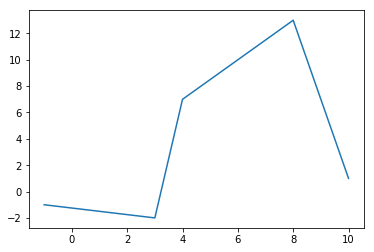

In [5]:
plt.plot(x, f)

...or a scatter plot by adding the `formatstring 'o'`...

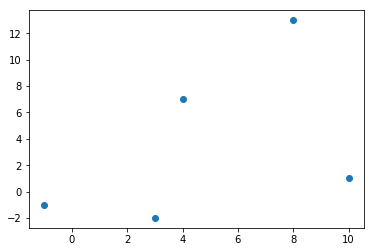

In [6]:
plt.plot(x, f, 'o')  

...or a line plot with data points by adding the `formatstring '-o'`.

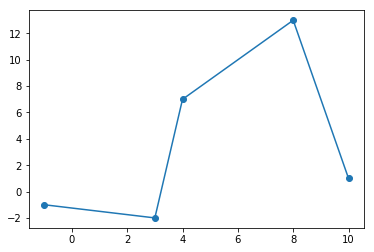

In [7]:
plt.plot(x, f, '-o')  

Notice the statement `[<matplotlib.lines.Line2D at 0x30990b0>]` appears each time (the numbers on your computer may look different). 

This is a handle to the line that is created with the last command in the code block (in this case `plt.plot(x, y)`). 

You can avoid printing this by putting a semicolon after the last command in the code block (so type `plot(x, y);`). 

(It can be useful to store this handle in a variable - we will discuss this later).

The `plot` function can take many arguments.

Summary so far, `plot` can take:
 - One argument `plot(y)`, which plots `y` values along the vertical axis and enumerates the horizontal axis starting at 0.
 - Two arguments, `plot(x, y)`, which plots `y` vs `x`.
 - Three arguments `plot(x, y, formatstring)`, which plots `y` vs `x` using colors and markers defined in `formatstring`.
 
 

Using the `formatstring` argument we can chnage:
 - the colour of the plot
 - the style of the markers
 - the style of the line

In the example below:
 - `r` makes the plot red
 - `x` makes the markers crosses
 - `-` makes the line solid

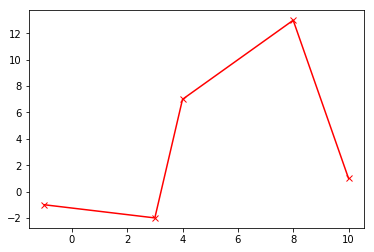

In [8]:
plt.plot(x, f, '-xr');

Note the semi-colon when calling the `plot` function.

Available colours, maker styles and line styles can be found in the matplotlib documentation. 
 - Colour: https://matplotlib.org/2.0.2/api/colors_api.html
 - Marker style: https://matplotlib.org/api/markers_api.html
 - Line style: https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/line_styles_reference.html

The `plot` function also takes a large number of keyword arguments. 

For example, to plot a line with width 6 (the default is 1): 

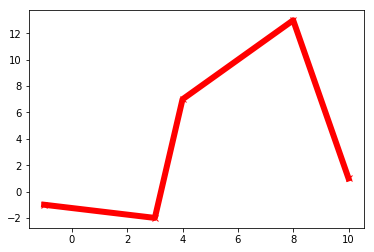

In [9]:
plt.plot(x, f, '-xr', linewidth=6);

Remeber keyword arguments must always appear after regular arguments when calling the function.

Documentation of all available keyword arguments can be found here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

Other methods such as `legend`, `xlabel`, `ylabel` and `title` can be used to add useful information to a plot.

### Adding labels, legend and title. 
The location of the legend can be set the the 'best' in terms of not obscuring data. 

The position of the legend can also be set expllicitly instead. The location codes acan be found here: https://matplotlib.org/api/legend_api.html

Using the $ sign can be used to italicise a string.

The font size of all strings in the figure can be selected.

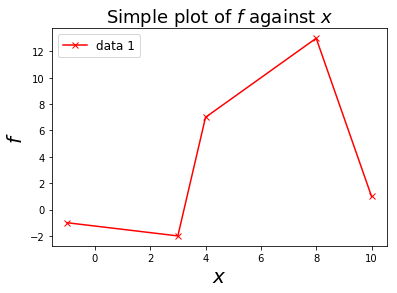

In [10]:
# Use the label kwarg to create a name to use in the figure legend. 
plt.plot(x, f, '-xr', label="data 1")

# Legend
plt.legend(loc='best', fontsize=12)

# Axes labels
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$f$', fontsize=20)

# Title
plt.title("Simple plot of $f$ against $x$", fontsize=18);

Note the semi-colon when calling the `title` function.

### Setting the axis limits
Example: plot the funstion $sin(x)$ for 100 equally spaced values of x between $0$ and $4 \pi$ (inclusive). 

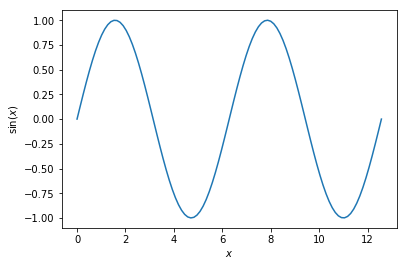

In [11]:
num_points = 100
x = np.linspace(0, 4*np.pi, num_points)
f = np.sin(x)

# Plot graph
plt.plot(x, f);

# Label axis
plt.xlabel('$x$')
plt.ylabel('$\sin(x)$')



The zero on the x axis is offset by an unknown amount. 

We can improve the appearance of the plot by specifying the $x$ limits:

(0.0, 12.566370614359172)

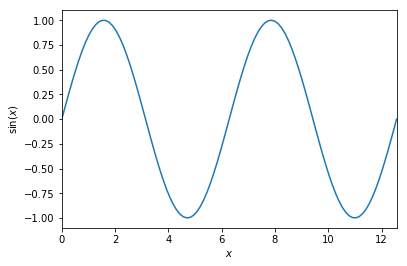

In [12]:
# Plot graph
plt.plot(x, f);

# Label axis
plt.xlabel('$x$')
plt.ylabel('$\sin(x)$')

# Use the start and end values in x as x limits 
plt.xlim(x[0], x[-1])

### Multiple Plots
Plots can be overlaid by called `plt.plot(...` multiple times.

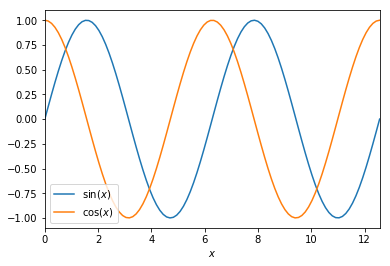

In [13]:
# Plot sin(x) and cos(x), and add label for each
plt.plot(x, np.sin(x), label="$\sin(x)$");
plt.plot(x, np.cos(x), label="$\cos(x)$");

# Label the x-axis
plt.xlabel('$x$');

# Add legend
plt.legend();

# Use the start and end values in x as x limits
plt.xlim(x[0], x[-1]);

### Saving a Plot
A plot can be saved as a file for your to use e.g. in a report.

A file name should be given.

The file type is specified using the file extension.

`/` can be used to seperate the names of nested folders.

In the example below, the graph is saved as a pdf and a png file in the `img` folder in your directory. 

Run the code in the cell below then open the folder `img` using the file browser on your computer to verify that the files were generated by noting the time stamp shown for each file. 

In [14]:
# Save plot to file
plt.savefig("img/my-plot.pdf")
plt.savefig("img/my-plot.png")

__Try it yourself__
<br>In the cell below:
- create a green line plot of the function $tan(x)$ using the range of $x$ from the last example. 
- add a blue triangular marker at $x=\frac{\pi}{2}, \pi, \frac{3\pi}{2}, 2\pi, \frac{5\pi}{2}, 3\pi, \frac{7\pi}{2} and 4\pi$.
- label the axes
- save the figure as a .jpg file in the `img` folder in your repository.


In [15]:
# tan(x)

## Bar charts and Histograms
### Bar charts
To represent data as a bar chart, for example, the number of students in each year of a degree program:

In [16]:
year_groups = ('B1', 'B2', 'B3', 'M1', 'M2')
num_students = (500, 332, 425, 300, 200)

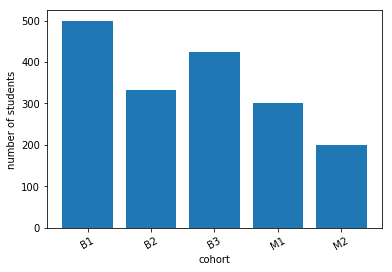

In [17]:
# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(year_groups))

# Produce bar plot
plt.bar(x_pos, num_students);

# Replace the x ticks with the year group name
# Rotate labels 30 degrees
plt.xticks(x_pos, year_groups, rotation=30);

# Add axis labels 
plt.xlabel('year group');
plt.ylabel('number of students');

## Histograms

We can visualise the distribution of the values using a histogram.

In a histogram, data is sorted into intervals (bins) along the horizontal axis. 

The number of values that fall within a 'bin' is then displayed on the vertical axis.

To create a histogram we first need a data set. 

For example we can use Numpy to generate a data set with:
- a normal (Gaussian) distribution
- a mean value of zero 
- a standard deviation of one
- 4000 random values


In [18]:
# loc=mean, scale=stddev, size=num samples
x = np.random.normal(loc=0.0, scale=1.0, size=4000)  

We can visualise how `x` is distributed, using 20 bins. 

Matplotlib creates 20 bins of equal width, and computes the number of entries in each bin. 

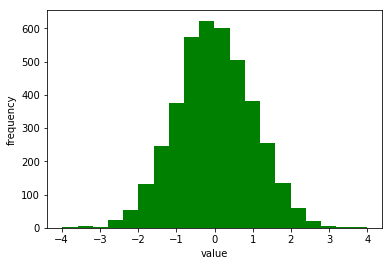

In [19]:
# Produce histogram with 20 bins
n, bins, patches = plt.hist(x, 20, facecolor='green');

# Add label
plt.xlabel('value')
plt.ylabel('frequency')

plt.show()

To view a list of:
- the bin intervals
- the number of values in each bin. 

In [20]:
print(bins)


[ -3.98399210e+00  -3.58566523e+00  -3.18733836e+00  -2.78901149e+00
  -2.39068462e+00  -1.99235775e+00  -1.59403087e+00  -1.19570400e+00
  -7.97377130e-01  -3.99050259e-01  -7.23387211e-04   3.97603484e-01
   7.95930356e-01   1.19425723e+00   1.59258410e+00   1.99091097e+00
   2.38923784e+00   2.78756471e+00   3.18589159e+00   3.58421846e+00
   3.98254533e+00]


In [21]:
print(n)

[   1.    4.    3.   22.   54.  133.  245.  376.  574.  623.  602.  506.
  382.  254.  135.   59.   21.    4.    1.    1.]


__Try it yourself__
<br>In the example above try changing the number of bins and run the cells again to see the change in the bin intervals and number of values in ech bin. 

## Interactive plots
By using interactive plots we can explore the influence that changing different parameters has on an output.



As a simple example, we will plot

$$
f(t) = t^{\alpha} \sin(\omega t)
$$

where $\alpha$ and $\omega$ are parameters. 

We will create two sliders allowing us to change the value of $\alpha$ and $\omega$ and observe the change in $f(t)$

Interactive plots be can created using module `ipywidgets` module which we imported at the start of the notebook. 
>```Python
try:
    import ipywidgets
except ImportError:
    try:
        !{sys.executable} -m pip -q install ipywidgets
        import ipywidgets
    except ImportError:
        !{sys.executable} -m pip -q --user install ipywidgets
    finally:
        !jupyter nbextension enable --py widgetsnbextension
        print("You will need to refresh your browser page")        
from ipywidgets import interact
```



We write the code to generate the plot as usual.

We encasulate the code to generate the plot within a function.

In [83]:
def plot(ω=1, α=0):
    "A plot of the function f(t)= (t**α)*np.sin(ω*t)"
    t = np.linspace(0, 2*np.pi, 200)
    
    
    
    # Axes labels, ω and α must be cast as strings to use value in title
    plt.xlabel('$t$')
    plt.ylabel('$f$')
    plt.title(r"$\alpha$ = {}, $\omega$ = {}".format(α, ω))
    plt.plot(t, (t**α)*np.sin(ω*t))
    
    plt.show() 

To generate symbols α or ω type `\omega` or `\alpha`, pressing  `Tab` key at the end.

The `interact` function, takes the following arguments:
- the plotting function 
- a tuple for each plotting function parameter with the maximum and minimum value (incluseive) and the step size between each possible value)

In [84]:
interact(plot, ω=(-10, 10, 0.25), α=(0, 2, 0.25));

A Jupyter Widget

You can now adjust the values by moving the sliders.

The new values appear as the title to the plot.

## Animated Plots

Plotting can be a very useful way to visualise what is happening in a dynamic physical system. 

Matplotlib can be used to create animated plots showing the chnage in a system over time.

We will use the `animation` and `rc` subpackages.  

>from matplotlib import animation, rc

We will also use a package to allow us to view the animated output within jupyter notebook.

>from IPython.display import HTML

These packages were imported at the start of this notebook.

Let's start with a very simple example to learn how to build an animation.

We will then move onto an example of a physical model that you may study in one of your other subjects. 

This is a the full code to produce an animated sin wave:

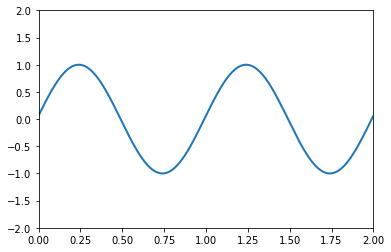

In [24]:
# Creates a figure window. 
fig = plt.figure()

# Creates axes within the window
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))

# Empty object (no data opints) to animate e.g. a line 
# Name must end with a `,` comma.  
line, = ax.plot([], [], lw=2)

# Animation function: called sequentially
# i = frame number.
# Sine wave generated, phase shift proportional to i
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
    
# Animates the data; 100 frames, 20ms delay between frames, blit=True : only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True)

# sets the animation dsiplay format to html which the non-Python parts of this notebook are written in.
rc('animation', html='html5')

# Plays the animation 
anim

# Saves the animation as a .mp4 file
# 15 frames per second
# 1800 bits of data processed/stored per second
# writer = animation.writers['ffmpeg'](fps=15, bitrate=1800)
# anim.save('img/sin_movie.mp4', writer=writer)

### Simulating Physical Systems: Spring-Mass System
If you are studying an enginerring related subject, you will most likely study simple harmonic motion; a type of periodic motion or oscillation motion.

For this oscillation to happen, the restoring force is directly proportional to the displacement and acts in the direction opposite to that of displacement.





A typical example of this is a mass attached to a spring.

<img src="img/spring_mass_system.gif" alt="Drawing" style="width: 500px;"/>



If we assume that:
 - the spring is ideal (it has no weight, mass, or damping losses)
 - there is no friction 
 
we can use a simple equation to give the position of the mass, $x$, as a function of time, $t$:

$x(t) = A cos(\omega t - \phi)$ 

where:
<br>$A$: Maximum amplitude (displacment from initial position), defined by the initial conditions of the system.
<br>$\phi$ : Phase (the initial angle of a sinusoidal function at its origin)
<br>$\omega$ : Angular frequency (frequency of oscillation expressed in radians)



Angular frequency

$\omega=2\pi f = \sqrt{\frac{k}{m}}$

where
<br>$k$ : spring constant
<br>$m$ : mass (kg)
<br>$f$ : frequency (Hz)

2.2360679775


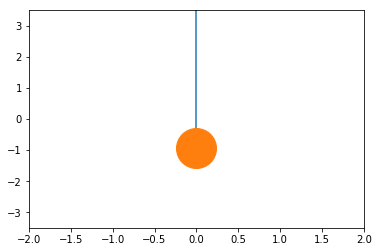

In [91]:
# Creates a figure window.
fig = plt.figure()

# Creates axes within the window
ax = plt.axes(xlim=(-2, 2), ylim=(-3.5,3.5))

# Two objects to animate
line,   = ax.plot([2,1], [4,3], marker="" , ls="-")  # for lines

point, = ax.plot([1], [1], marker='o', ms=40)  # for points


# Spring data
k = 100
m = 20
w = np.sqrt(k/m)
phi = 2
A = 2

# Position of mass as function of time
def fun(t):
    global w,phi,A
    return A*np.sin(w*t+phi)

def animate(i):
    
    x = fun(i/10) 
    
    line.set_data([0,0], [4, -x])    
    point.set_data(0, -x)    
    return line, point
    
# Animates the data; 100 frames, 20ms delay between frames, blit=True : only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=500, interval=50, blit=True)

anim

# writer = animation.writers['ffmpeg'](fps=15, bitrate=1800)
# anim.save('img/spring_movie.mp4', writer=writer)

## Visualising 2D Arrays

Two-dimensonal arrays can be visualized with the `plt.matshow` function.

Each square cell represents one element of the array.

A colour scale (`plot.colorbar`) is used to indicate the value of each cell.

Note that the first row of the matrix (with index 0), is plotted at the top, which corresponds to the location of the first row in the matrix.

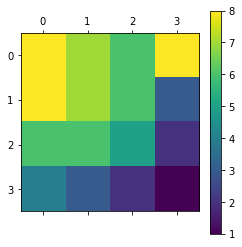

In [26]:
x = np.array([[8, 7, 6, 8],
              [8, 7, 6, 3],
              [6, 6, 5, 2],
              [4, 3, 2, 1]])
plt.matshow(x)

plt.colorbar()

The default colour map is used (it is called `viridis`).

The highest value in the array is mapped to yellow.
<br>The lowest value is mapped to purple. 
<br>The number is between vary between blue and green. 

There are many other colour maps available.

Doumentation of availble colour maps can be found here: http://matplotlib.org/users/colormaps.html. 

To change the color map, the `matplotlib.cm` package is used, which we imported and renamed at the strt of the notebook. 
>`import matplotlib.cm as cm`

Specify the name of any of the available color maps with the `cmap` keyword. 

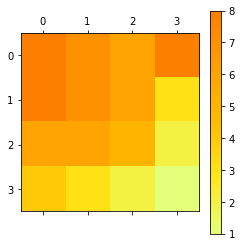

In [27]:
plt.matshow(x, cmap=cm.Wistia)
plt.colorbar();

The keywords `vmin` and `vmax` can be used to explicitly set the maximum and minimum value for the colour scale. 

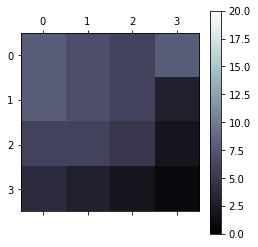

In [28]:
plt.matshow(x, cmap=cm.bone, vmin=0, vmax=20)
plt.colorbar();

The standard colormaps also all have reversed versions. They have the same names with `_r` tacked on to the end.

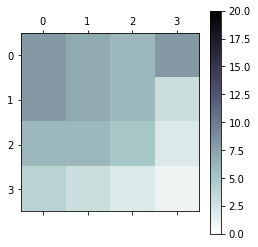

In [29]:
plt.matshow(x, cmap=cm.bone_r, vmin=0, vmax=20)
plt.colorbar();

__Try it yourself__
<br>Find a colour map you like using the link provided. Change the colours of the examples above to colours that you prefer.

## 3D Plotting
An advantage of plotting compuationally is that we can easily produce more complex figures such as 3D plots.  

This can be useful, for example, when visualiing the form of a function with two independent variables.



Many different styles of 3D plot are available.

A number of examples can be found here: https://matplotlib.org/examples/mplot3d/index.html 

Today, we will go through just one example. 

You can then explore further, using today's seminar as a basis.

We will plot the function: 
$$
f(x, y) = \sin(x) \cos\left(\frac{xy^2}{10}\right)
$$
as a 3D surface.

Plotting in 3D requires another package which was imported at the start of this notebook. 
>`from mpl_toolkits.mplot3d import axes3d`

First we create points in the $x$ and $y$ directions at which we want to evaluate the function: 

In [30]:
N = 50  # 50 points in each direction
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)

Next, we use NumPy to create a 'grid' of $(x, y$) points: 

In [31]:
X, Y = np.meshgrid(x, y)

When printing you may want to round the value of each element.

You can do this using the `np.around` function. 

Example:
<br>`print(np.around(X,2), np.around(Y,2))`
<br>rounds each value to 2 decimal places.

__Try it yourself__
<br>The easiest way to visualise how `meshgrid` work is to:
- try making `N` smaller (fewer points along each axis) in the cell above.

<br>
In the cell below:
- print `X` and `Y` using <br>`print(np.around(X,2))`<br>`print(np.around(Y,2))`
- print the shape of `X` and `Y` using<br>`print(X.shape)`<br>`print(Y.shape)`
- What happens if N is different for `X` than for `Y`?

In [32]:
# How does meshgrid work?

Hopefully, you can see that by overlaying `X` and `Y` we can dscribe the x,y coordinates of every point on the 3D surface.

Change the value of `N` to it's original value `N = 50`.

We now evaluate the function $f$ at each point:

In [33]:
f = np.sin(X)*np.cos((X*Y**2)/10)

The 3D figure is plotted using:

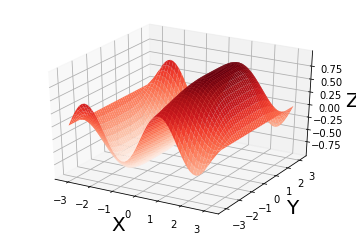

In [34]:
# Create a figure
fig = plt.figure()

# Specify 3D axes
ax = plt.axes(projection='3d')

# Plot the function as a surface
surf = ax.plot_surface(X, Y, f ,cmap=cm.Reds)

# Label the axes
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)

## Review Exercises
Below are some exercises for you to practise producing plots and figures.
<br>Some of the examples require you to generate data using methods we have studied in previous seminars.



### Review Exercise: Simple Plot
In the cell below, write a program to:
- Plot $y=x^{3}-x^{2}-4x+4$ for $x = -3$ to $x= 3$.
- Use a red, dashed line.
- On the same figure, plot a black square at every point where $y$ equals zero. 
- Set the size of the markers to 10.
- Label the axes as 'x-axis' and 'y-axis'. 
- Add a title of your choice.  

*Hint: You may have to search online for the function argunents needed for some of these manipulations.* 

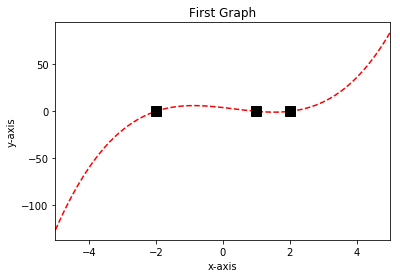

In [104]:
# Simple Plot
x = np.linspace(-5, 5, 100)
y = x**3 - x**2 - 4*x + 4

plt.plot(x, y, 'r--')

r = np.roots([1, -1, -4, 4])
z = np.zeros(len(r))
             
plt.plot(r, z, 'ks', markersize=10)
plt.xlim(x[0], x[-1]);

plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.title('First Graph');

### Review Exercise: Plotting with Conditionals
Create an array, `x` with 100 values from 0 to 20, inclusive. 

Compute $y=\sin(x)$.

Plot $y$ vs. $x$ with a blue line. 

Replace all values of $y$ that are larger than 0.5 with 0.5.

Replace all values of $y$ that are smaller than $-$0.75 with $-0.75$.

Plot $x$ vs. $y$ using a red line on the same graph. 

(0.0, 20.0)

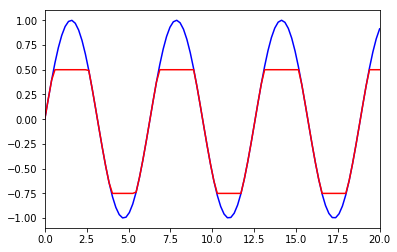

In [96]:
x = np.linspace(0, 20, 100)
y = np.sin(x)
plt.plot(x, y, 'b')
y[y > 0.5] = 0.5
y[y < -0.75] = -0.75
plt.plot(x, y, 'r');
plt.xlim(x[0], x[-1])

### Review Exercise: Bar Chart

Write a Python programming to display a bar chart of the popularity of programming Languages.

Set the bar colour green.

Sample data: 
<br>Programming languages: Java, Python, PHP, JavaScript, C#, C++
<br>Popularity: 22.2, 17.6, 8.8, 8, 7.7, 6.7

Label the x and y axes and add a title.

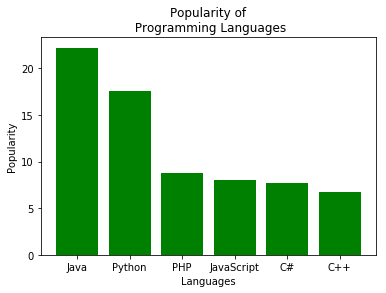

In [42]:
languages = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]

# Create an array with the position of each bar along the x-axis
x_pos = np.arange(len(languages))

# Produce bar plot
plt.bar(x_pos, popularity, color='green')

# Replace the x ticks with the year language name
plt.xticks(x_pos, languages)

# Title and axes labels
plt.xlabel("Languages")
plt.ylabel("Popularity")
plt.title("Popularity of\n Programming Languages" );



### Review Exercise: Plotting Functions Interactively

Consider the function 
$$
f(x) = e^{x/10} \sin(ax)\cos(bx)
$$
from $x = -4\pi$ to $x = 4\pi$.  

1. Plot the function when $a = b = 1$. Label the axes.
1. Create an interactive plot with sliders for $a$ and $b$, varying from 0 to 2.

In [105]:
# Interactive plot

def plot(a=1, b=1):

    x = np.linspace(-4*np.pi, 4*np.pi, 200)
    plt.xlabel('$x$')
    plt.ylabel('$f$')
    

    f = np.exp(x/10) * np.sin(a * x) * np.cos(b * x)
    
    plt.plot(x, f)
    
    plt.xlim(x[0], x[-1]);

    
interact(plot, a=(0, 2, 0.25), b=(0, 2, 0.25)); 

A Jupyter Widget

### Review Exercise: Plotting Functions Interactively

Consider the function we used earlier:

$x(t) = A cos(\omega t - \phi)$

The position of a mass $x$ (relative to it's start position), attached to a spring, as a function of time, depends on the angular frequency $\omega$ and the phase $ \phi$ of the system. 

1. Plot the function from from $t = 0$ to $t = 10$, when $A$ = 5 and $\omega = \phi = 2$. Label the axes.
1. Create an interactive plot with sliders for $\omega$ and $\phi$, varying from 0 to 4.
1. Label the axes
1. Observe the change in the position of $x$ as a function of time $t$ as you change $\omega$ and $\phi$ 



In [106]:
# Interactive Plot
A = 5

def plot(ω=2, ϕ=2):

    t = np.linspace(0, 10, 200)
    plt.xlabel('$t$')
    plt.ylabel('$x$')
    

    x = A * np.cos(ω * t - ϕ)
    
    plt.plot(t, x)
    
    plt.xlim(t[0], t[-1]);

    
interact(plot, a=(0, 4, 0.25), b=(0, 4, 0.25)); 

A Jupyter Widget

### Review Exercise: Visualising 2D Arrays 
Create:
- a Numpy 30 by 30 array
- with randomly selected integer values for all elements
- with an allowable range for each element of 1 to 50

Represent the array using `matshow`:
- Use a colour map of your choice
- Set the colour scale minimum to 1
- Set the colour scale maximum to 25
- Display a colour scale on the plot

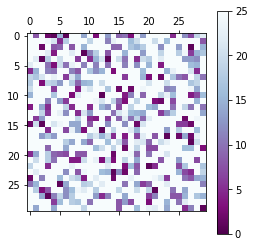

In [110]:
# 2D Array plot
a = np.random.randint(1, 50, size=(30,30))

plt.matshow(a, cmap=cm.BuPu_r, vmin=0, vmax=25)

plt.colorbar();

### Review Exercise: Animated Plot - Projectile Trajectory

A projectile is launched with initial velocity $v$, at an angle of $\theta$.

If we neglect the force of drag on the projectile, it's position in the x and y direction at time $t$ can be found by.

$x= vt\cos(\theta)$
<br>$y= vt\sin(\theta) - \frac{1}{2}gt^2$

where gravity, $g=9.81$ms$^{-2}$ 

<img src="img/projectile2.png" alt="Drawing" style="width: 300px;"/>

In the cell below write a program to animate the motion of an ideal projectile when launched:
 - from an angle of $\theta$=
 - with an initial velocity of $v=$

In [ ]:
### Review Exercise: Animated Plot - Projectile Trajectory

# Creates a figure window.
fig = plt.figure()

# Creates axes within the window
ax = plt.axes(xlim=(0, 100), ylim=(0,100))

# Create object to animate
point, = ax.plot([1], [1], marker='o', ms=40)  # for points






fig, ax = plt.subplots()

g = 9.8                               #value of gravity
v = 20                                #initial velocity
theta = 20*np.pi/180                  #initial angle of launch in radians
tt = 2*v*np.sin(theta)/g              #total time of flight
t = np.linspace(0, tt, 0.01)          #time of flight into an array
x = v*np.cos(theta)*t                 #x position as function of time
line, = ax.plot(x, v*np.sin(theta)*t-(0.5)*g*t**2) #plot of x and y in time

def animate(i):
    line.set_xdata(v*np.cos(theta)*(t+i/10.0))
    line.set_ydata(v*np.sin(theta)*(t+i/10.0)-(0.5)*g*(t+i/10.0)**2)  
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_xdata(np.ma.array(t, mask=True))
    line.set_ydata(np.ma.array(t, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200),
init_func=init, interval=25, blit=True)
plt.show()





# Spring data
k = 100
m = 20
w = np.sqrt(k/m)
phi = 2
A = 2

# Position of mass as function of time
def fun(t):
    global w,phi,A
    return A*np.sin(w*t+phi)

def animate(i):
    
    x = fun(i/10) 
    
    line.set_data([0,0], [4, -x])    
    point.set_data(0, -x)    
    return line, point
    
# Animates the data; 100 frames, 20ms delay between frames, blit=True : only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=500, interval=50, blit=True)

anim

# writer = animation.writers['ffmpeg'](fps=15, bitrate=1800)
# anim.save('img/spring_movie.mp4', writer=writer)

In [ ]:
### Review Exercise: Animated Plot - Mass and Spring Velocity

In [ ]:
### Review Exercise: 3D plotting

### Extension Exercise: Plotting System of Simultaneous Equations Interactively. 